# Boston Housing Dataset

## About the Dataset

The Boston Housing Dataset contains information collected by the US Census Service in 1970 on various house prices in the area of Boston. The dataset is small in size with only 506 samples and 14 variables. The data gives values for various features of different suburbs of Boston as well as the median-value for homes in each suburb. The features were chosen to reflect various aspects believed to influence houses prices including the structure of the house (age and spaciousness), the quality of the neighborhood, transportation access to employment centers and highways, and pollution. REWORD LAST SENTANCE!

## Objective

The goals of this assessment are as follows:
 - describe the dataset using descriptive statistics and plots.
 - use inferential statistics to determine whether there is a significant difference in median house prices between houses that    are along the Charles river and those that are not.
 - use keras to create a neural network that can predict the medium house price based on the other variables in the dataset.



## Python Libraries

Python has a large number of libraries which makes it a powerful programming language for analysing data. The libraries that were imported and used in this project were NumPy, Pandas, Matplotlib, Seaborn, Sklearn, Scipy and Keras. 

 - NumPy - an array processing package.
 - Pandas - a data processing library which provides tools for shaping, merging, reshaping, and slicing data sets.
 - Matplotlib - a graphing library to create 2D plots and graphs on a variety of data formats.
 - Seaborn library - a plotting and styling library.
 - Scikit-learn is a library that provides many unsupervised and supervised learning algorithms.
 - SciPy is a library that uses NumPy for more mathematical functions.
 - Keras is an open-source neural-network library written in Python.

In [2]:
# for generating random variables
import numpy as np

# for plotting
import matplotlib.pyplot as plt 

# for managing data
import pandas as pd

# for plotting
import seaborn as sns 

# for t-tests and ANOVA
import scipy.stats as stats

# for learning algorithms
import sklearn

# to create a neural network
import keras as kr

# for encoding categorical variables.
import sklearn.preprocessing as pre

# for splitting into training and test sets.
import sklearn.model_selection as mod

%matplotlib inline

# to increase the size of the plots as plots are too small otherwise
plt.rcParams['figure.figsize'] = (20.0, 10.0)

Using TensorFlow backend.


## Load the dataset

The Boston Housing dataset can be accessed through the scikit-learn library. I can directly import the dataset from the scikit-learn library rather than downloading the csv file from an external website. The Boston dataset is made of 506 rows and 14 columns. It is a relatively small, clean and well-known dataset used for machine learning projects.

In [3]:
# load the dataset from the scikit-learn library

from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
# print the shape of the dataset and a description of the variables. This shows 506 samples, 14 variables and no missing values.

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Create a Panda's Dataframe

The data is transferred to a Panda's dataframe to carry out descriptive statistics on the dataset.

In [5]:
# load data into dataframe and print the first 5 rows of data

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Median value is a missing variable - the target variable - this needs to be added to the dataframe 

boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Descriptive Statistics

Now that the dataset has been loaded into a Panda's dataframe and the missing variable MEDV has been added, I will analyse the dataset to learn more about what it contains.
The Panda's describe function produces the descriptive statistics on the dataset. The mean, standard deviation, maximum number, minimum number, 25% quartile range, 50% quartile range and 75% quartile range are produced for each of the 14 variables.

In [7]:
# descriptive statistics are obtained using the describe function. Adding the .T swaps the rows and columns.

boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


It is difficult to obtain a clear picture of the dataset using the basic raw descriptive statistics - it is not very informative in this state. Visualisation tools provide a much better way to analyse the dataset and will give a better understanding of the data.

In [8]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
# rename the variables to the full variable name to avoid confusion
boston.columns = ['crime_rate', 'large_zones', 'industrial', 'charles_river', 'nitric_oxide', 'rooms', 'old_houses', 'distance', 'highway_access', 'property_tax', 'pupil_teacher_ratio', 'proportion_blacks', 'lower_status', 'median_value']
boston.head()

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,median_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Visualisations

The raw descriptive statistics gave all the relevant information on each of the variables in the dataset, however using visual tools such as histograms, boxplots and scatterplots make it easier to visualise the distribution of each of the 14 variables.

Using the Seaborn library I will plot the distribution of the target variable median_value using the histogram and boxplot functions. This target variable is the median-value of houses within a given suburb in $1'000's.

I will then calculate the correlation between variables using the corr function in Pandas and plot a heatmap using the Seaborn plotting library.

Finally I will use the Seaborn pairplot function to visualise both the distribution of single variables and the relationship between two variables. Pairplots will show any trends that require further analysis.

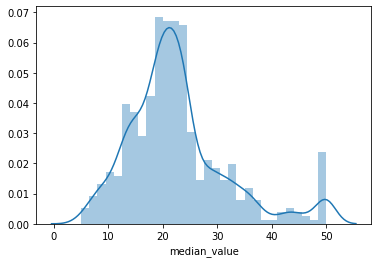

In [10]:
# create a histogram on the 'median_value'
sns.distplot(boston['median_value'], bins=30)
plt.show()

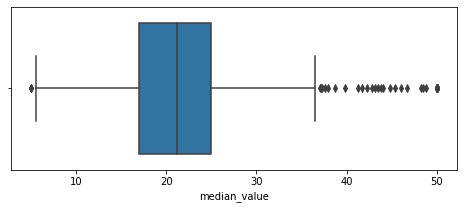

In [11]:
# create a boxplot on variable 'median_value'
plt.figure(figsize=(8,3))
sns.boxplot(boston['median_value'])

### Overview of median_value:

Looking at the distribution on the histogram for the median_value it shows a distribution that is quite close to a normal distribution with several outliers. The values are centred around approximately 22,000 and the minimum value is 5,000 and maximum value is 50,000.The boxplot shows a symmetric distribution with one outlier to the left and several to the right.The range of the distribution is 45,000.

### Correlation

Finding the correlation between variables is a useful way to check for patterns in the dataset. To find the correlation between variables the Pandas .corr() function can be used. The output of each of these correlation functions will fall within the range -1 to +1. 1 indicates variables are positively correlated, -1 indicates variables are negatively correlated and 0 indicates variables are not correlated.

In [12]:
# run the Panda's corr function on the boston dataframe

boston.corr()

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,median_value
crime_rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
large_zones,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
industrial,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
charles_river,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nitric_oxide,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
old_houses,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
distance,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
highway_access,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
property_tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


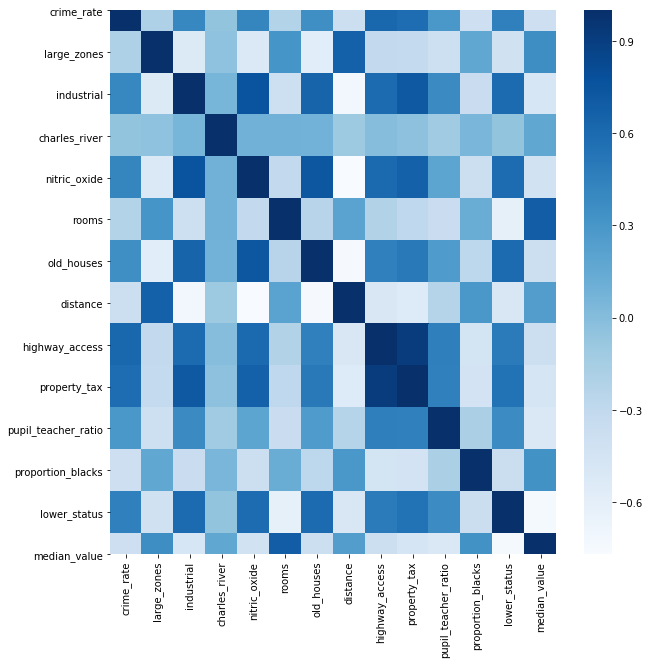

In [13]:
# using Pearson Correlation
plt.figure(figsize=(10,10))

# assign a variable cor
cor = boston.corr()

# create a heatmap in seaborn
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)

In [14]:
#Correlation with target variable
cor_target = abs(cor["median_value"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

rooms                  0.695360
pupil_teacher_ratio    0.507787
lower_status           0.737663
median_value           1.000000
Name: median_value, dtype: float64

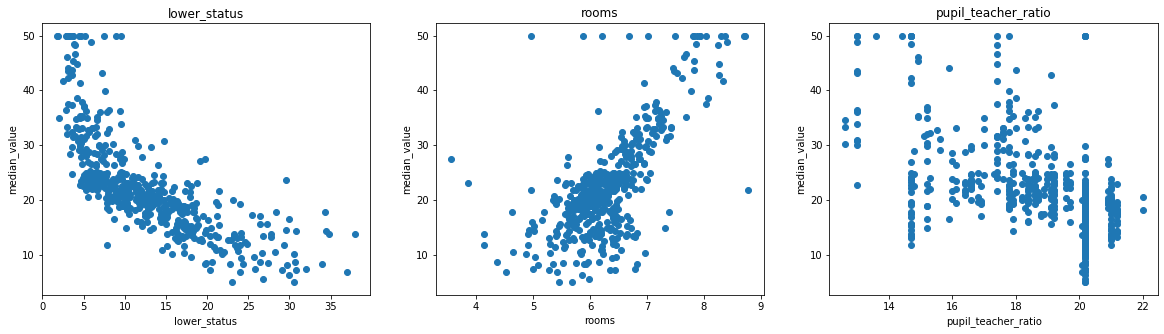

In [15]:
# set plot size
plt.figure(figsize=(20, 5))

# assign variables 
features = ['lower_status', 'rooms', 'pupil_teacher_ratio']
target = boston['median_value']

# plot each feature with target variable
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('median_value')

### Overview of Correlation

Rooms, pupil_teacher_ratio and lower_status are highly correlated to median_value with values over 0.5. This makes sense as one would expect that if a house has more rooms then the value of the house would be higher. The pupil to teacher ratio has a negative correlation as does lower status. This also makes sense as if the ratio of pupils to teachers is high and the lower status is high then house prices would be lower. As one would assume that there are less schools in the area and there is a greater number of lower class people in the area. REWORD.

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that rooms (average number of rooms per dwelling) has a strong positive correlation with median_value (0.7) where as lower_status (% lower status of the population) has a high negative correlation with median_value (-0.74). This makes sense as dwellings with more rooms are likely to be higher in value and where there is a lower status in the population it is likely that dwellings would be lower in value in that area. Also in areas where there are less schools and the pupil teacher ratio is higher we would expect that dwellings would be lower in value.

The scatter plots show clearly that the higher the lower_status the lower the median value and the more rooms in the dwelling the higher the median value.

## Inferential Statistics

ADD WORDING

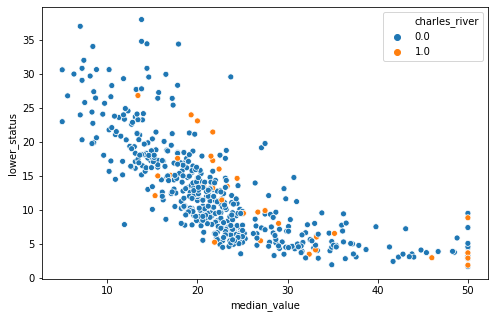

In [16]:
# set plot size
plt.figure(figsize=(8,5))

# create scatter plot
sns.scatterplot(data=boston,x='median_value',y='lower_status', hue='charles_river')

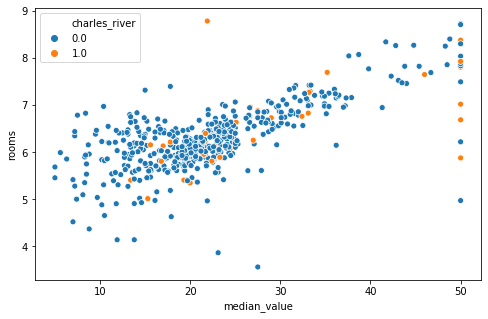

In [17]:
# set plot size
plt.figure(figsize=(8,5))

# create scatter plot
sns.scatterplot(data=boston,x='median_value',y='rooms', hue='charles_river')

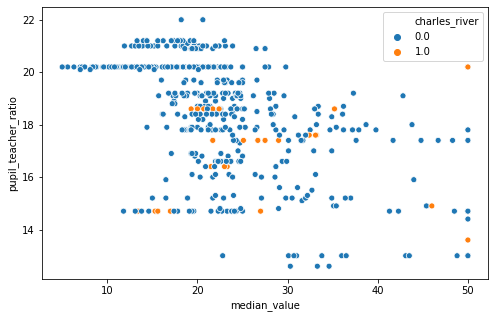

In [18]:
# set plot size
plt.figure(figsize=(8,5))

# create scatter plot
sns.scatterplot(data=boston,x='median_value',y='pupil_teacher_ratio', hue='charles_river')

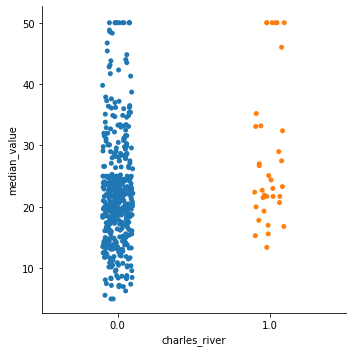

In [19]:
# create a catplot
sns.catplot(data=boston,x='charles_river', y='median_value')

In [20]:
import scipy.stats as ss
chas1=boston[boston['charles_river']==1]['median_value']
chas0=boston[boston['charles_river']==0]['median_value']
ss.ttest_ind(chas1, chas0)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

### Observations

The null hypothesis is that houses bound by Charles River are not more expensive that those that aren't bounded by river.

I want to prove that houses on the Charles River are more expensive that those that aren't.

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

Is there a significant difference in median house prices along the river?
The houses are well scattered along the river.



# Neural Network

ADD WORDING - how I developed the model, how I prepared data, how I validated results etc


In [21]:
boston.head()

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,median_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
# create a new dataframe with the input variables for the neural network
inputs = boston[['crime_rate', 'large_zones', 'industrial', 'charles_river', 'nitric_oxide', 'rooms', 'old_houses', 'distance', 'highway_access', 'property_tax', 'pupil_teacher_ratio', 'proportion_blacks', 'lower_status']
]
inputs.head()

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
# create a new variable for the output from the neural network
output = boston['median_value']
output

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: median_value, Length: 506, dtype: float64

### Standardisation

As we see different data distributions, we will standardize the dataset using StandardScaler function in scikit-learn. This is a useful technique where the attributes are transformed to a standard gaussian distribution with a mean of 0 and a standard deviation of 1.

In [24]:
import sklearn.preprocessing as pre

pre.scale(inputs)
inputs_scale=pd.DataFrame(pre.scale(inputs), columns=inputs.columns)
inputs_scale


,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [25]:
inputs_scale.mean().round(2)

crime_rate            -0.0
large_zones            0.0
industrial             0.0
charles_river         -0.0
nitric_oxide          -0.0
rooms                 -0.0
old_houses            -0.0
distance               0.0
highway_access         0.0
property_tax          -0.0
pupil_teacher_ratio    0.0
proportion_blacks     -0.0
lower_status          -0.0
dtype: float64

In [26]:
# import keras
import keras as kr

# Create a new neural network
m = kr.models.Sequential()

# Add neurons
m.add(kr.layers.Dense(128, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(64, activation="relu"))
m.add(kr.layers.Dense(1))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam", metrics=['mae'])

# Train the model.
m.fit(inputs_scale, output, epochs=80, batch_size=10)



Epoch 1/80
506/506 [==============================] - 3s 5ms/step - loss: 437.7121 - mae: 18.7350
Epoch 2/80
506/506 [==============================] - 0s 542us/step - loss: 101.5792 - mae: 7.8582
Epoch 3/80
506/506 [==============================] - 0s 591us/step - loss: 28.5260 - mae: 3.9229
Epoch 4/80
506/506 [==============================] - 0s 605us/step - loss: 20.8034 - mae: 3.2627
Epoch 5/80
506/506 [==============================] - 0s 516us/step - loss: 17.8954 - mae: 2.9798
Epoch 6/80
506/506 [==============================] - 0s 516us/step - loss: 16.6125 - mae: 2.8396
Epoch 7/80
506/506 [==============================] - 0s 463us/step - loss: 15.3257 - mae: 2.7086
Epoch 8/80
506/506 [==============================] - 0s 557us/step - loss: 14.3798 - mae: 2.6328
Epoch 9/80
506/506 [==============================] - 0s 585us/step - loss: 13.4928 - mae: 2.5655
Epoch 10/80
506/506 [==============================] - 0s 680us/step - loss: 12.9822 - mae: 2.5494
Epoch 11/80
506/50

In [27]:
# predicted outputs of neural network
np.round(m.predict(inputs_scale).T)

array([[23., 22., 32., 31., 31., 25., 20., 20., 16., 19., 20., 19., 21.,
        18., 17., 19., 21., 16., 19., 18., 14., 16., 15., 14., 15., 15.,
        15., 14., 17., 18., 14., 16., 14., 15., 13., 21., 21., 22., 23.,
        28., 35., 30., 24., 25., 21., 20., 21., 19., 17., 19., 20., 20.,
        26., 21., 18., 34., 23., 29., 22., 20., 18., 17., 23., 26., 31.,
        26., 18., 20., 18., 19., 24., 21., 23., 23., 24., 21., 20., 21.,
        19., 20., 27., 23., 23., 21., 24., 27., 23., 24., 28., 30., 24.,
        24., 23., 24., 20., 27., 23., 40., 43., 34., 24., 25., 20., 19.,
        21., 20., 19., 21., 21., 19., 22., 23., 18., 17., 21., 18., 20.,
        19., 19., 19., 21., 21., 20., 17., 20., 21., 16., 17., 19., 16.,
        20., 20., 21., 17., 14., 17., 17., 19., 15., 17., 15., 14., 13.,
        15., 14., 15., 17., 14., 15., 16., 20., 19., 16., 18., 17., 16.,
        14., 39., 27., 24., 29., 48., 48., 50., 20., 23., 50., 20., 24.,
        24., 19., 20., 23., 25., 24., 30., 24., 25.

In [28]:
# actual outputs for median_value
np.round(output.as_matrix())

C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([24., 22., 35., 33., 36., 29., 23., 27., 16., 19., 15., 19., 22.,
       20., 18., 20., 23., 18., 20., 18., 14., 20., 15., 14., 16., 14.,
       17., 15., 18., 21., 13., 14., 13., 13., 14., 19., 20., 21., 25.,
       31., 35., 27., 25., 25., 21., 19., 20., 17., 14., 19., 20., 20.,
       25., 23., 19., 35., 25., 32., 23., 20., 19., 16., 22., 25., 33.,
       24., 19., 22., 17., 21., 24., 22., 23., 23., 24., 21., 20., 21.,
       21., 20., 28., 24., 25., 23., 24., 27., 22., 22., 24., 29., 23.,
       22., 23., 25., 21., 28., 21., 39., 44., 33., 28., 26., 19., 19.,
       20., 20., 20., 20., 20., 19., 22., 23., 19., 19., 18., 18., 21.,
       19., 20., 19., 22., 20., 20., 17., 19., 21., 16., 16., 18., 14.,
       19., 20., 23., 18., 16., 18., 17., 17., 13., 18., 14., 14., 13.,
       16., 12., 14., 16., 15., 18., 15., 22., 20., 15., 19., 17., 16.,
       13., 41., 24., 23., 27., 50., 50., 50., 23., 25., 50., 24., 24.,
       22., 17., 19., 23., 24., 23., 29., 23., 25., 30., 37., 40

In [29]:
# calculate the mean squared error which is the difference between the neural network prediction 
# and the actual outputs
np.sqrt(np.sum(m.predict(inputs_scale).T - output.as_matrix())**2)

C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


100.57163200378417

Epoch 1/100
506/506 [==============================] - 0s 389us/step - loss: 4.4607 - mae: 1.5602
Epoch 2/100
506/506 [==============================] - 0s 478us/step - loss: 4.5132 - mae: 1.5804
Epoch 3/100
506/506 [==============================] - 0s 492us/step - loss: 4.3953 - mae: 1.5354
Epoch 4/100
506/506 [==============================] - 0s 494us/step - loss: 4.3646 - mae: 1.5236
Epoch 5/100
506/506 [==============================] - 0s 467us/step - loss: 4.2876 - mae: 1.5127
Epoch 6/100
506/506 [==============================] - 0s 492us/step - loss: 4.1067 - mae: 1.4872
Epoch 7/100
506/506 [==============================] - 0s 522us/step - loss: 4.1015 - mae: 1.4941
Epoch 8/100
506/506 [==============================] - 0s 433us/step - loss: 4.3201 - mae: 1.5223
Epoch 9/100
506/506 [==============================] - 0s 536us/step - loss: 3.9627 - mae: 1.4593
Epoch 10/100
506/506 [==============================] - 0s 407us/step - loss: 3.9969 - mae: 1.4695
Epoch 11/100
506/50

506/506 [==============================] - 0s 304us/step - loss: 2.1275 - mae: 1.0795
Epoch 84/100
506/506 [==============================] - 0s 261us/step - loss: 2.2155 - mae: 1.0923
Epoch 85/100
506/506 [==============================] - 0s 510us/step - loss: 2.1762 - mae: 1.0624
Epoch 86/100
506/506 [==============================] - 0s 265us/step - loss: 2.1757 - mae: 1.1030
Epoch 87/100
506/506 [==============================] - 0s 267us/step - loss: 2.0522 - mae: 1.0673
Epoch 88/100
506/506 [==============================] - 0s 271us/step - loss: 2.0738 - mae: 1.0697
Epoch 89/100
506/506 [==============================] - 0s 287us/step - loss: 2.1495 - mae: 1.0817
Epoch 90/100
506/506 [==============================] - 0s 393us/step - loss: 1.9713 - mae: 1.0376
Epoch 91/100
506/506 [==============================] - 0s 273us/step - loss: 1.8970 - mae: 1.0199
Epoch 92/100
506/506 [==============================] - 0s 267us/step - loss: 1.9688 - mae: 1.0461
Epoch 93/100
506/506 [=

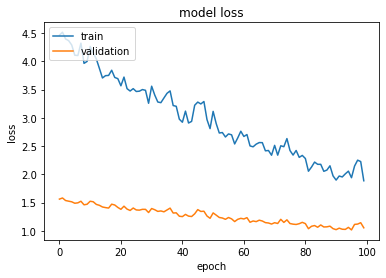

In [30]:
history = m.fit(inputs_scale, output, epochs=100, batch_size=10)
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# References

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

http://www.datasciencemadesimple.com/descriptive-summary-statistics-python-pandas/

https://keras.io/

https://www.tensorflow.org/

http://prisoft.com/data-analysis-in-python-using-the-boston-housing-dataset/

https://gogul.dev/software/regression-example-boston-housing-prices

https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/




